In [238]:
import numpy as np
from scipy import signal
from scipy import misc
from skimage import io
from skimage import color
import matplotlib.pyplot as plt

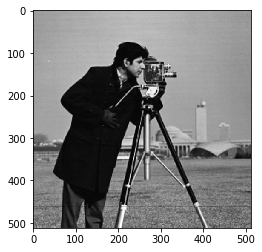

In [239]:
cameraman=io.imread('cameraman.png')
cameraman= color.rgb2grey(cameraman)


plt.imshow(cameraman, cmap='gray')
plt.show()

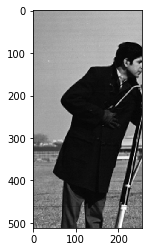

In [240]:
temp =np.copy(cameraman[0:512, 0:256])
plt.imshow(temp, cmap='gray')
plt.show()

In [241]:
def circular_cross_correlation(array1,array2):

    array1 = array1 - np.mean(array1[:])
    array2 = array2 - np.mean(array2[:])
    tilted_array2 = np.fliplr(array2)
    tilted_array2 = np.flipud(tilted_array2)
    TA = np.fft.fft2(tilted_array2)
    FA = np.fft.fft2(array1)
    FF = np.multiply(FA , TA)
    ret = np.real(np.fft.ifft2(FF))
    print('CCC ::  ',ret)
    return ret


def RemoveNeighborhood(C,x,ssize):
    #     % Remove a 2-D neighborhood around x=[x1,x2] from matrix X and output a 1-D vector Y
    #     % ssize     square neighborhood has size (ssize x ssize) square
    #    C : X ,len(C), len(c)-PeakLocation : x ,squaresize : ssize
    print('x: ',x[0])
    print('x: ',x[1])
    (M,N) = np.shape(C);
    
    print('ssize',ssize)
    radius = (ssize-1)/2;
    shift=int(radius-x[1]-1)
    print('radius-x[1]+1: ',shift)
    
    X = np.roll(C,shift,axis=0)
    print('shape of X after rolling: ',np.shape(X))
    Y = np.roll(X,shift,axis=1)
    Z = Y [ssize+1:Y.shape[0],1:ssize]
    Z=Z.flatten()    
    print(Z)
    Z=[Z,Y[M*ssize+1:Y.shape[1]]]
    
#     plt.imshow(img, cmap='gray')
#     plt.show()

    return np.array(Z)
     
     
     
def PCE(C):
    
    print(C)
    shift_range = [0,0]
    x=print(C.shape[0], C.shape[1])
    print(x)
    Cinrange = C[C.shape[0]-1, C.shape[1]-1]
    
    print('Cinrange: ',Cinrange)
    Cinrange_1d= Cinrange.flatten()
    [max_value,index_max]=[np.max(Cinrange_1d) ,Cinrange_1d.argmax()]
    print('max_value',max_value)
    print('index_max',index_max)
    ind2sub=np.unravel_index([index_max], (C.shape[0],C.shape[1]))
    sub_index=ind2sub[0][0]
    ypeak=ind2sub[0][0]
    xpeak=ind2sub[1][0]
    Cinrange=[[max_value]]    
   
    print('Cinrange matrix',Cinrange)

    peakheight=Cinrange[0][0]
    print('peakheight : ',peakheight)
    PeakLocation= np.array(shift_range)  -  np.array([ypeak,xpeak])
    
    print('PeakLocation : ',PeakLocation)
    
    
    squaresize = 11    
    # size(C) - PeakLoacation
    diffrence_of_distanceof_C_and_Peaklocation=list([C.shape[0]-PeakLocation[0], C.shape[1]-PeakLocation[1]]) 
    print('diffrence_of_distanceof_C_and_Peaklocation: ',diffrence_of_distanceof_C_and_Peaklocation)
    
    
    C_without_peak = RemoveNeighborhood(C,diffrence_of_distanceof_C_and_Peaklocation,squaresize)
    
    correl=C[C.shape[0]-1, C.shape[1]-1]
    print('print type C_without_peak: ',type(C_without_peak))
    print('print:C_without_peak ',C_without_peak)
    
    m=np.multiply(C_without_peak , C_without_peak)
    print('m :',m[0])
    PCE_energy=np.mean(m[0])
    
    print('PCE_energy',PCE_energy)
    
#     PCE= (peakheight)**2 / PCE_energy * np.sign(peakheight)
    
#     print('PCE : ',PCE)
    

#     % signed PCE, peak-to-correlation energy    (the sign added as of 10/26/2011)

    PCE = (correl**2)/PCE_energy
    print('PCE : ',PCE)
    return PCE

In [242]:
ccc=circular_cross_correlation(cameraman,cameraman)
PCE(ccc)


CCC ::   [[9.81248852e+08 9.45338971e+08 9.08872816e+08 ... 9.49559548e+08
  9.83896594e+08 9.98288052e+08]
 [9.58809042e+08 9.28264943e+08 8.96452828e+08 ... 9.36307723e+08
  9.63884856e+08 9.73943307e+08]
 [9.34547774e+08 9.09575476e+08 8.82897518e+08 ... 9.20863462e+08
  9.41759503e+08 9.47725833e+08]
 ...
 [9.63884856e+08 9.36307723e+08 9.04376947e+08 ... 9.28264943e+08
  9.58809042e+08 9.73943307e+08]
 [9.83896594e+08 9.49559548e+08 9.13097510e+08 ... 9.45338971e+08
  9.81248852e+08 9.98288052e+08]
 [9.92575478e+08 9.54653819e+08 9.16176240e+08 ... 9.54653819e+08
  9.92575478e+08 1.00994956e+09]]
[[9.81248852e+08 9.45338971e+08 9.08872816e+08 ... 9.49559548e+08
  9.83896594e+08 9.98288052e+08]
 [9.58809042e+08 9.28264943e+08 8.96452828e+08 ... 9.36307723e+08
  9.63884856e+08 9.73943307e+08]
 [9.34547774e+08 9.09575476e+08 8.82897518e+08 ... 9.20863462e+08
  9.41759503e+08 9.47725833e+08]
 ...
 [9.63884856e+08 9.36307723e+08 9.04376947e+08 ... 9.28264943e+08
  9.58809042e+08 9.7394

8.689109702472804